In [1]:
######################################     Modules     #######################################
# MODULES
import sys
from time import process_time
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

sys.path.append('../.')
import verbose_module
sys.path.append('../../../.')
import pIRPgym

path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/pIRPgym/'
experiments_path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/Experiments/Flower Agent/'

sizes = [5,10,15,20,30,None]
num_episodes = 2000

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-11


# Instance Visualization

### Supplier Availability

In [2]:
def plot_distributions(size,indicator,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    if indicator=='Availability':
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.q_parameters)
    else:
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.p_parameters)

interact(plot_distributions,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'),
         indicator=widgets.Dropdown(options=['Availability','Prices'],value='Availability',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_distributions(size, indicator, episode)>

### Supplier Locations

In [3]:
def plot_locations(size,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,[])

interact(plot_locations,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_locations(size, episode)>

# Training

In [4]:
def print_training_summary(size,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)

    print(f'---------- Training Summary ----------\n')
    print(f'Training time: {None}')
    print('\nProportion of generated routes')
    CG_gen,GA_gen = pIRPgym.Visualizations.RoutingV.count_generated(FlowerAgent.generator)
    print(f'- Column Generation: {round(100*CG_gen/len(FlowerAgent.routes),2)}%')
    print(f'- Genetic Algorithm: {round(100*GA_gen/len(FlowerAgent.routes),2)}%')


interact(print_training_summary,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=30,description='Episodes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.print_training_summary(size, episode)>

### N Table

In [5]:
def plot_n_table(size,episode,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,suppliers)

interact(plot_n_table,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=['All'],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_n_table(size, episode, suppliers)>

### Key Performance Indicators

In [6]:
def plot_flower_indicators(size,episode,indicator1,indicator2,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.plot_indicators(FlowerAgent.metrics,FlowerAgent.bincod,indicator1,indicator2,suppliers)

interact(plot_flower_indicators,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=['All'],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_flower_indicators(size, episode, indicator1, indicator2, suppliers)>

### Visualize routes

In [7]:
def render_routes(size,solution,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[solution])

interact(render_routes,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=10,description='Episodes:'),
         solution=widgets.Dropdown(options=range(1,26),value=1,description='Routes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.render_routes(size, solution, episode)>

# Flower Analysis and Comparison

### Key Performance Indicators

In [8]:
def plot_flowers_comparison(size,episode,indicator1,indicator2,flower1,flower2):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    print('\n')
    pIRPgym.Visualizations.RoutingV.plot_flower_comparison(FlowerAgent.history,indicator1,indicator2,flower1,flower2)
    print('\n')

interact(plot_flowers_comparison,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         flower1=widgets.Dropdown(options=[i for i in range(1,51)],value=1,description='Flower 1:'),
         flower2=widgets.Dropdown(options=[i for i in range(1,51)],value=2,description='Flower 2:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_flowers_comparison(size, episode, indicator1, indicator2, flower1, flower2)>

# Testing

### Overall performance

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# def plot_performance_box(dictionary,objective):
#     """
#     Plot box plots of performances for different policies.

#     Parameters:
#     - dictionary (dict): Dictionary containing policies as keys and a list of values as the corresponding values.

#     Returns:
#     None
#     """
#     fig,ax = plt.subplots(figsize=(10, 6))

#     # Create a DataFrame for seaborn plotting
#     data = [(policy, value) for policy, values in dictionary.items() for value in values]
#     df = pd.DataFrame(data, columns=['Policy', 'Performance'])

#     # Define a color palette for better visibility
#     colors = sns.color_palette('Set2', n_colors=len(dictionary))

#     # Plot box plots with different colors
#     sns.boxplot(x='Policy', y='Performance', data=df, ax=ax, palette=colors)

#     # Set labels and title
#     ax.set_xlabel('Policy')
#     y_lab = {'Transport Cost':'Cost',
#              'Cost per Supplier':'Cost',
#              'Service Level':'Proportion of met demand',
#              'Reactive Service Level':'Proportion of met demand'}
#     ax.set_ylabel(y_lab[objective])
#     ax.set_title(f'Performance on {objective}')

#     # Remove spines
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)

#     # Add grid for better readability
#     ax.grid(True, linestyle='--', alpha=0.7)

#     plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(performance_data,objective):
    """
    Plot boxplots for different policies.

    Parameters:
    - performance_data (dict): Dictionary containing policies as keys and lists of values as values.
    """
    # Set up figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette for better visibility
    colors = ['purple', 'red', 'orange']

    # Plot boxplots for each policy
    for i, (policy, values) in enumerate(performance_data.items()):
        sns.boxplot(x=[policy]*len(values), y=values, color=colors[i % len(colors)], ax=ax)

    # Set labels and title
    ax.set_xlabel('Policies', fontsize=12)
    ax.set_ylabel('Performance', fontsize=12)
    ax.set_title('Performance Comparison Across Policies', fontsize=14)

    # Remove legend
    # ax.legend().set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.show()


interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_n_table(size, objective)>

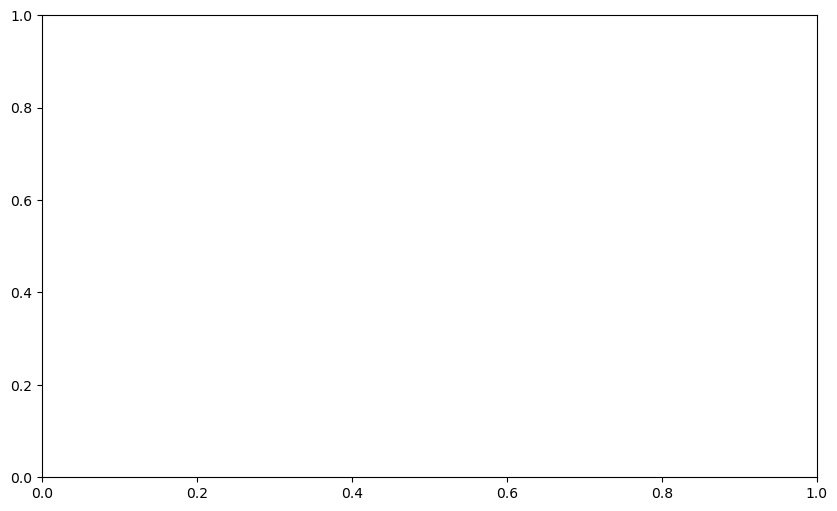

In [22]:
def plot_n_table(size,objective):
    if objective == 'Transport Cost':pos2=0
    elif objective == 'Cost per Supplier':pos2=1
    elif objective == 'Service Level':pos2=0
    elif objective == 'Reactive Service Level':pos2=1

    with open(experiments_path+f'Testing/M{size}-E10.pkl', 'rb') as file:
        results = pickle.load(file)

    info,TP_results,SL_results,C_results,seeds = results.values()

    data = {'Two Phases':list(),'Service Level':list(),'Cost':list()}
    for episode in range(info[2]):
        if objective in ['Transport Cost','Cost per Supplier']:
            data['Two Phases'].append(TP_results[episode][0][2][pos2])
            data['Service Level'].append(SL_results[episode][0][2][pos2])
            data['Cost'].append(C_results[episode][0][2][pos2])
        elif objective in ['Service Level','Reactive Service Level']:
            data['Two Phases'].append(TP_results[episode][2][pos2])
            data['Service Level'].append(SL_results[episode][2][pos2])
            data['Cost'].append(C_results[episode][2][pos2])
        else:
            data['Two Phases'].append(TP_results[episode][1][1])
            data['Service Level'].append(SL_results[episode][1][1])
            data['Cost'].append(C_results[episode][1][1])

    plot_boxplots(data,objective)
    # pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,objective)

interact(plot_n_table,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         #episode=widgets.Dropdown(options=[30],value=30,description='Episodes:'),
         objective=widgets.Dropdown(options=['Transport Cost','Cost per Supplier','Service Level',
                                             'Reactive Service Level','Purchase Cost'],
                                    value='Transport Cost',description='Episodes:'))